In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


In [2]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

def preprocess_data(data, lag_start=1, lag_end=38, test_size=0.15, window_size=10):
    # Проверка на DatetimeIndex уже не требуется, так как index_col='timestamp' при загрузке
    features = ['open', 'high', 'low', 'close', 'volume']
    for feature in features:
        for i in range(lag_start, lag_end + 1):
            data[f'{feature}_lag_{i}'] = data[feature].shift(i)
        data[f'{feature}_rolling_mean'] = data[feature].rolling(window=window_size).mean()
        data[f'{feature}_rolling_std'] = data[feature].rolling(window=window_size).std()
        data[f'{feature}_pct_change'] = data[feature].pct_change()
        data[f'{feature}_daily_min'] = data[feature].rolling(window='24H').min()
        data[f'{feature}_daily_max'] = data[feature].rolling(window='24H').max()

    data = data.dropna()

    X = data.drop(features, axis=1)
    y = data['open']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train, X_test, y_train, y_test


MAE: 0


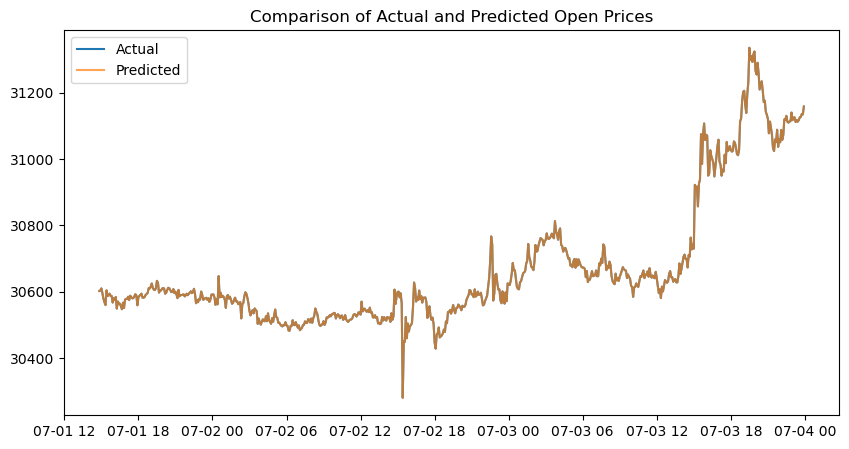

In [3]:
X_train, X_test, y_train, y_test = preprocess_data(data)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {round(mae)}')

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Comparison of Actual and Predicted Open Prices')
plt.show()


MAE: 0.0
MAPE: 0.0%


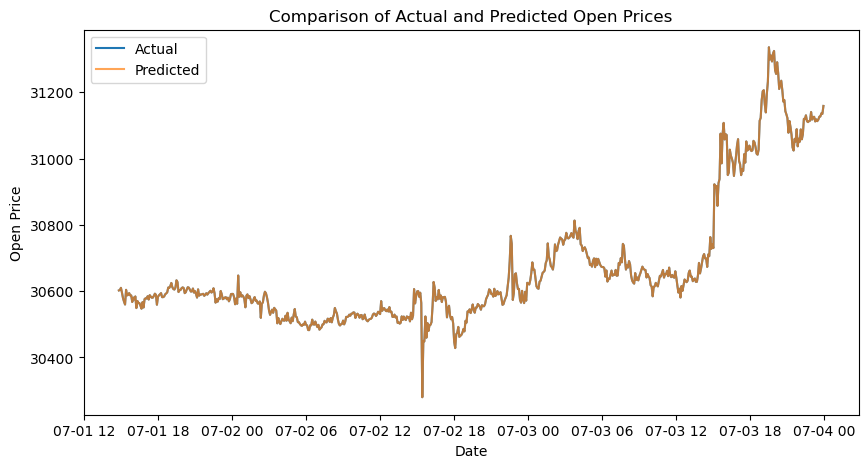

In [4]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    # Рассчитываем ошибку только для не нулевых значений
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Обработка данных и обучение модели, как показано выше
X_train, X_test, y_train, y_test = preprocess_data(data)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Расчет MAE и MAPE
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {round(mae, 2)}')
print(f'MAPE: {round(mape, 2)}%')

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Comparison of Actual and Predicted Open Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()